In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [119]:
def find_n(R,t,H):
    v1 = R/float(H)
    v2 = t/float(R)
    print(f'({(v2*v1):.3f}, {v1:.3f})')
    nu = 0.5

    n_all = [2,3,4,5,6]

    p_cr = lambda n: ((np.pi*v1)**2 + n**2)**2 * v2**3 / (12 * (1-nu**2) * n**2) + (np.pi*v1)**4 * v2/(n**2 * ((np.pi*v1)**2 + n**2)**2)

    p_cr_all = [p_cr(n) for n in n_all]
    return np.argmin(p_cr_all) + 2


def find_n_alt(v_R, v_t):
    v1 = v_R
    v2 = v_t / v_R
    # print(f'({v1:.3f},{v2:.3f})')
    nu = 0.5

    n_all = [2,3,4,5,6]

    p_cr = lambda n: ((np.pi*v1)**2 + n**2)**2 * v2**3 / (12 * (1-nu**2) * n**2) + (np.pi*v1)**4 * v2/(n**2 * ((np.pi*v1)**2 + n**2)**2)

    p_cr_all = [p_cr(n) for n in n_all]
    return n_all[np.argmin(p_cr_all)]



In [120]:
find_n(10,0.56,18) #4
find_n(8.8, 1.2, 44.75) #2
find_n(10, 0.58, 27) #3

(0.031, 0.556)
(0.027, 0.197)
(0.021, 0.370)


3

In [ ]:
folds4 = (0.556,0.056)

In [158]:
R_possible = [8.8,10]
t_possible = np.linspace(0.5,0.6,20)
H_possible = np.linspace(30,35,10)

In [133]:
num_try_R = 400
num_try_t = 400

res_all = np.zeros((num_try_R, num_try_t), dtype = int)

v_R_try = np.linspace(0.1,0.6, num_try_R)
v_t_try = np.linspace(0.01,0.05, num_try_t)

for i,v_R in enumerate(v_R_try):
    for j,v_t in enumerate(v_t_try):
        res_all[i,j] = int(find_n_alt(v_R,v_t))

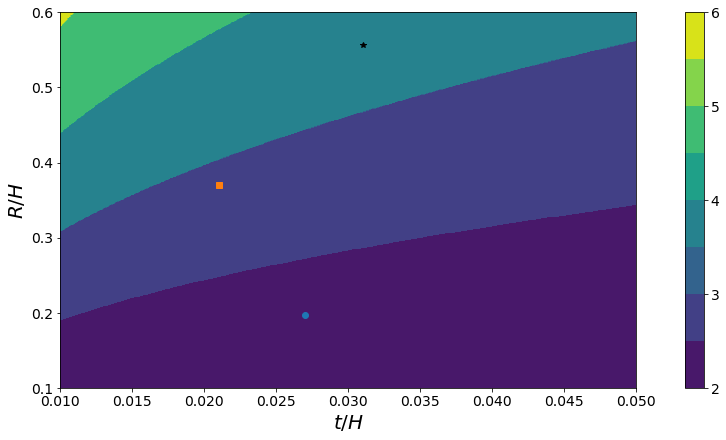

In [135]:
fig, ax = plt.subplots(figsize = (10,6), constrained_layout = True)


# ax.imshow(res_all)
ax.plot(0.031, 0.556, '*', color = 'k')
ax.plot(0.027, 0.197, 'o')
ax.plot(0.021, 0.370, 's')
num_values = np.unique(res_all)
xv, yv = np.meshgrid(v_R_try, v_t_try, indexing='ij')
map_thing = ax.contourf(yv, xv, res_all)



cbar = fig.colorbar(map_thing, ticks=[2,3,4,5,6])
cbar.ax.set_yticklabels(['2', '3', '4', '5', '6'])
cbar.ax.tick_params(labelsize=14)
ax.set_xlabel('$t/H$', fontsize = 20)
ax.set_ylabel('$R/H$', fontsize = 20)
ax.tick_params(labelsize = 14)
ax.set_xlim(np.min(v_t_try), np.max(v_t_try))
ax.set_ylim(np.min(v_R_try), np.max(v_R_try))

fig.savefig('scream yi/heat_map_heread_v1.jpg', dpi = 300)


array([30.        , 30.55555556, 31.11111111, 31.66666667, 32.22222222,
       32.77777778, 33.33333333, 33.88888889, 34.44444444, 35.        ])

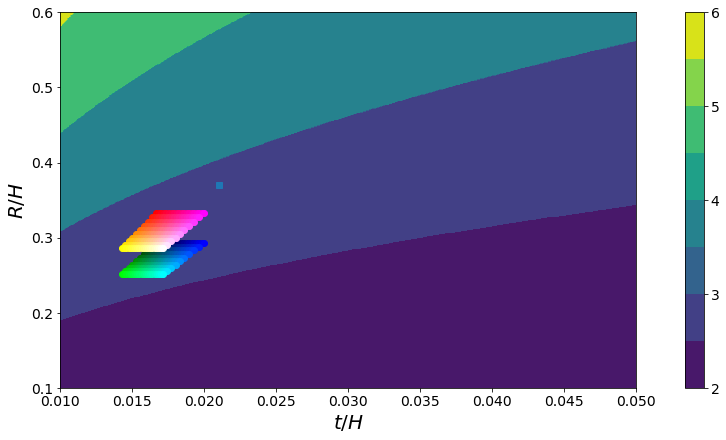

In [159]:
fig, ax = plt.subplots(figsize = (10,6), constrained_layout = True)

for i,R in enumerate(R_possible):
    for j,H in enumerate(H_possible):
        for k,t in enumerate(t_possible):
            v_R = R/H
            v_t = t/H
            n = find_n_alt(v_R, v_t)
            # if n == 3:
            #     print(f'R = {R:.2f}, H = {H:.2f}, t = {t:.2f}')
            
            color_cur = (i/(len(R_possible)-1), j/(len(H_possible)-1), k/(len(t_possible)-1))
            ax.plot(v_t, v_R, 'o', color = color_cur)

# ax.plot(0.031, 0.556, '*', color = 'k')
# ax.plot(0.027, 0.197, 'o')
ax.plot(0.021, 0.370, 's')
num_values = np.unique(res_all)
xv, yv = np.meshgrid(v_R_try, v_t_try, indexing='ij')
map_thing = ax.contourf(yv, xv, res_all)



cbar = fig.colorbar(map_thing, ticks=[2,3,4,5,6])
cbar.ax.set_yticklabels(['2', '3', '4', '5', '6'])
cbar.ax.tick_params(labelsize=14)
ax.set_xlabel('$t/H$', fontsize = 20)
ax.set_ylabel('$R/H$', fontsize = 20)
ax.tick_params(labelsize = 14)
ax.set_xlim(np.min(v_t_try), np.max(v_t_try))
ax.set_ylim(np.min(v_R_try), np.max(v_R_try))

fig.savefig('scream yi/heat_map_heread_v1.jpg', dpi = 300)
H_possible
